# NBAPositionify: Leveraging Data Mining Techniques to Classify Professional Basketball Players into Positions

In [2]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Get Dataset from Kaggle
# Requires the kaggle package to download dataset. Uncomment the line below to install
# !pip3 install kaggle
import kaggle
# Requires kaggle.json (Kaggle API Key) placed in ~/.kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("drgilermo/nba-players-stats", path="./data/", unzip=True)

## Exploratory Data Analysis

Our data is from `basketball-reference.com`. Three datasets:

In [4]:
player_data = pd.read_csv("./data/player_data.csv")
player_data.head(1)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University


In [5]:
players = pd.read_csv("./data/Players.csv")
players.head(1)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN


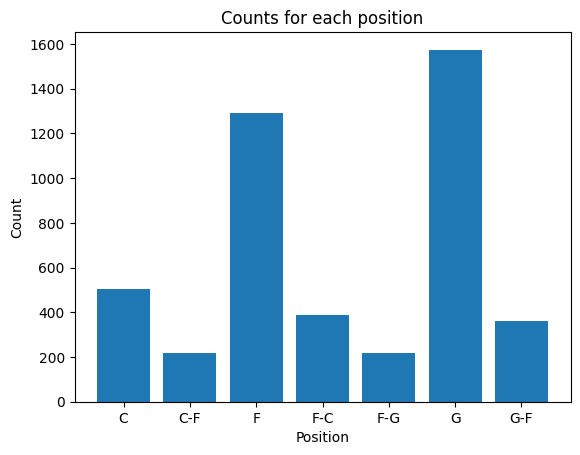

In [6]:
plt.bar(player_data.groupby('position').size().index, player_data.groupby('position').size().values)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Counts for each position')
plt.show()

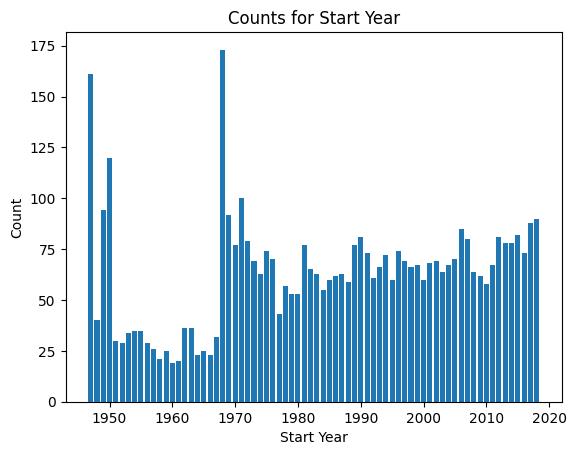

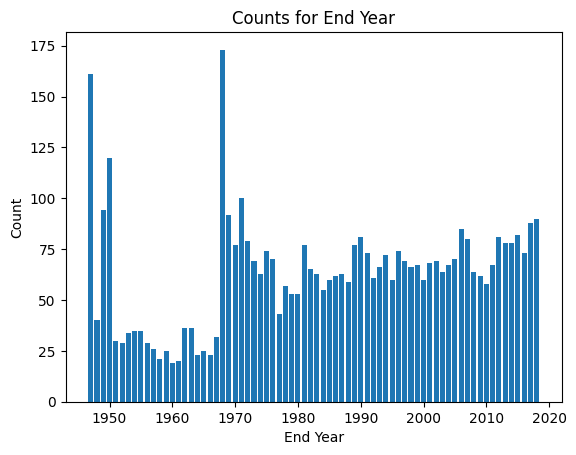

In [7]:
plt.bar(player_data.groupby('year_start').size().index, player_data.groupby('year_start').size().values)
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.title('Counts for Start Year')
plt.show()

plt.bar(player_data.groupby('year_start').size().index, player_data.groupby('year_start').size().values)
plt.xlabel('End Year')
plt.ylabel('Count')
plt.title('Counts for End Year')
plt.show()

In [8]:
stats = pd.read_csv("Seasons_Stats.csv")
stats = stats.rename(columns={"Unnamed: 0" : "Index"})
for index, row in stats.iterrows():
    if not pd.isna(row["Pos"]):
        positions = row["Pos"].split("-")
        print(positions)
        stats.at[index, "Pos"] = positions[0]
        for i in range(1, len(positions)):
            position = positions[i]
            new_row = stats.iloc[index].copy()
            new_row["Pos"] = position
            stats.loc[len(stats)] = new_row

stats.head()

['G', 'F']
['SG']
['SF']
['F']
['F']
['F']
['G']
['G', 'F']
['F', 'C']
['F', 'C']
['F', 'C']
['PG']
['F', 'C']
['SF']
['F', 'G']
['C']
['G']
['PF']
['G', 'F']
['G']
['F', 'G']
['F']
['C']
['PF']
['G']
['F', 'G']
['SG']
['G', 'F']
['F', 'C']
['F', 'C']
['F', 'C']
['F', 'C']
['PG']
['F', 'C']
['F', 'C']
['F', 'C']
['F']
['SF']
['G', 'F']
['G', 'F']
['G', 'F']
['PF']
['G', 'F']
['G']
['F', 'C']
['PF']
['G']
['G']
['G']
['PG']
['F']
['F']
['G']
['F', 'C']
['G']
['F', 'C']
['SF']
['F', 'C']
['F', 'C']
['F', 'C']
['G']
['F', 'G']
['F', 'G']
['F', 'G']
['F', 'G']
['G']
['F', 'G']
['SG']
['PF']
['SG']
['F', 'C']
['F', 'C']
['SG']
['G']
['F', 'G']
['F', 'C']
['F', 'C']
['F', 'C']
['F', 'C']
['F']
['F']
['F', 'C']
['F']
['F', 'G']
['C']
['F', 'G']
['F', 'G']
['F', 'G']
['C']
['C']
['G', 'F']
['G', 'F']
['PF']
['G', 'F']
['F', 'C']
['G']
['G']
['G']
['G']
['F']
['C']
['C']
['C']
['G']
['C', 'F']
['G']
['G', 'F']
['SF']
['PG']
['F']
['F']
['F', 'G']
['G']
['SF']
['PG']
['PG']
['PG']
['PF']
['C']
[

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# Unsupervised Naive K-Means Clustering (Points, Rebounds, Assists, Steals, Blocks)

As part of our exploratory data analysis, we did a round of naive k-means clustering, taking into account 5 stat columns which are subjectively "most relevant" to player performance and player type: points, rebounds, assists, steals and blocks. We used 5 clusters in the hopes of seeing each cluster group associated with a different position. The results yielded clusters which had datapoints evenly distributed between the 5 position classes. We hypothesized that a reason for this could be a lack of data preprocessing - some players had more stats than others, so they would be grouped in a similar class, regardless of which stats stood out. To that end, we decided to try multiple types of preprocessing on these columns - division by the number of minutes played, and normalization.

In [9]:
from sklearn.cluster import KMeans

unsupervised_kmeans_stats = stats[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]].dropna()

unsupervised_kmeans_stats_1 = unsupervised_kmeans_stats.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(unsupervised_kmeans_stats_1)

unsupervised_kmeans_stats_1["cluster"] = kmeans.labels_
unsupervised_kmeans_stats_1.insert(0, "Pos", stats["Pos"])
unsupervised_kmeans_stats_1.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
3851,C,865.0,259.0,664.0,166.0,80.0,104.0,1
3852,C,2191.0,287.0,891.0,386.0,112.0,283.0,3
3853,SF,759.0,133.0,315.0,141.0,110.0,12.0,1
3854,PG,182.0,16.0,53.0,56.0,36.0,1.0,0
3855,PG,1268.0,89.0,202.0,374.0,137.0,22.0,2


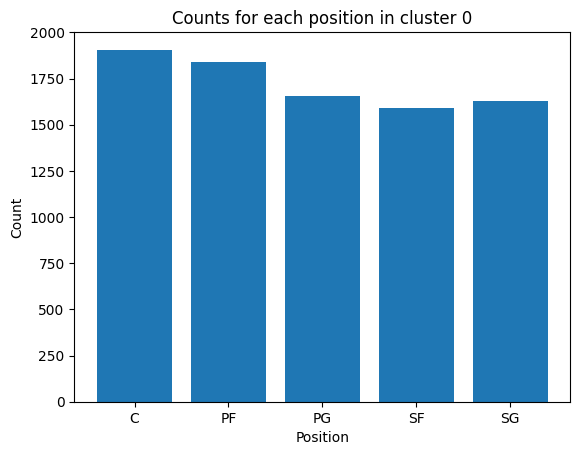

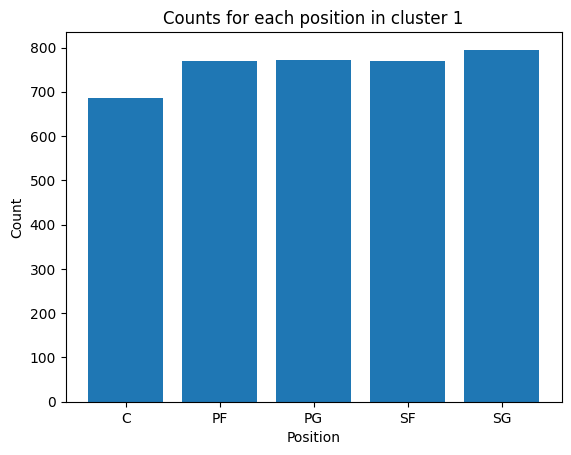

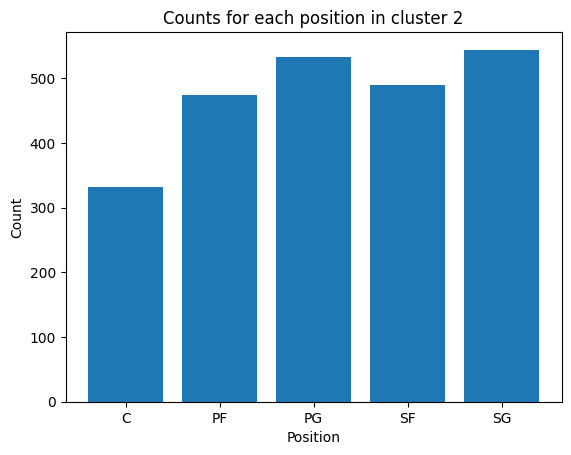

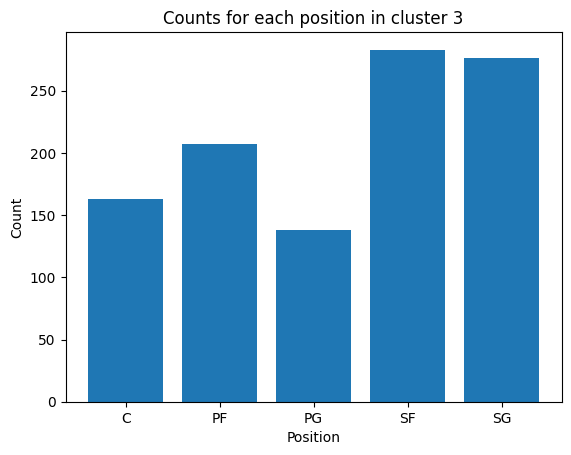

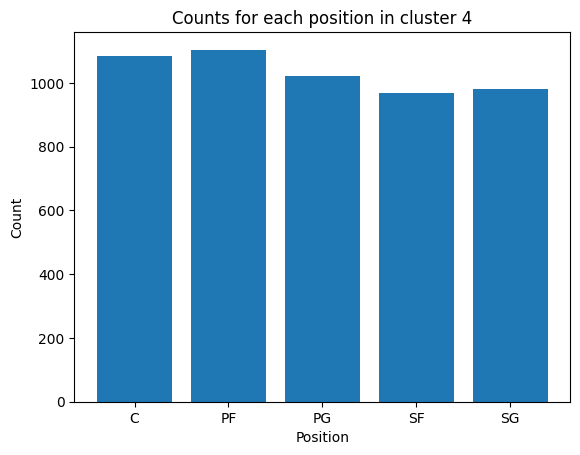

In [10]:
for cluster in range(5):
    cur_df = unsupervised_kmeans_stats_1.loc[unsupervised_kmeans_stats_1["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

### Normalization

In [11]:
# Normalization
unsupervised_kmeans_stats_2 = (unsupervised_kmeans_stats-unsupervised_kmeans_stats.mean())/unsupervised_kmeans_stats.std()

kmeans = KMeans(n_clusters=5)
kmeans.fit(unsupervised_kmeans_stats_2)

unsupervised_kmeans_stats_2["cluster"] = kmeans.labels_
unsupervised_kmeans_stats_2.insert(0, "Pos", stats["Pos"])
unsupervised_kmeans_stats_2.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
3851,C,0.764401,2.931790,3.550634,0.388506,1.039005,2.161562,2
3852,C,3.507900,3.348581,5.109527,1.994608,1.867051,7.022579,2
3853,SF,0.545087,1.056232,1.153922,0.205994,1.815298,-0.336838,1
3854,PG,-0.648728,-0.685358,-0.645328,-0.414545,-0.099557,-0.635560,0
3855,PG,1.598210,0.401275,0.377910,1.907002,2.513961,-0.065273,3


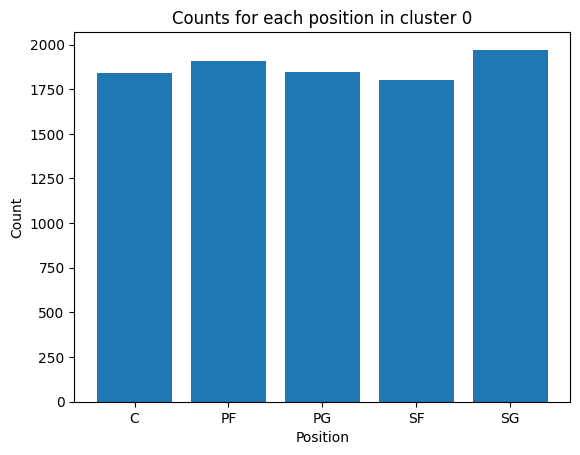

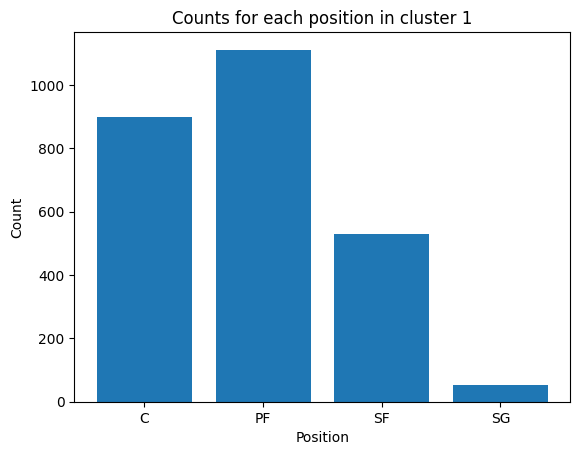

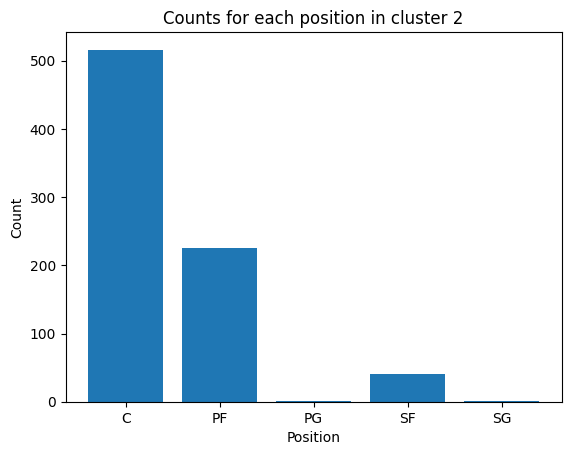

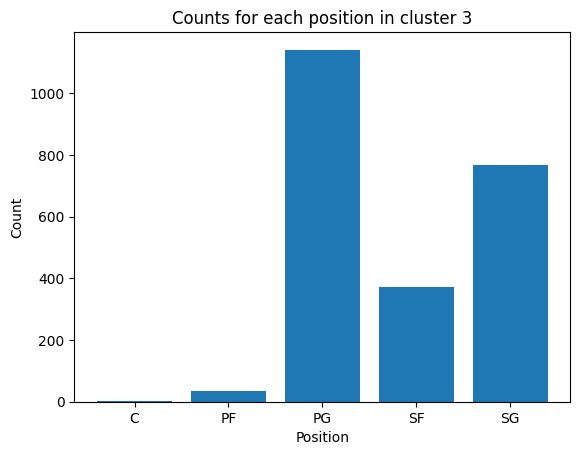

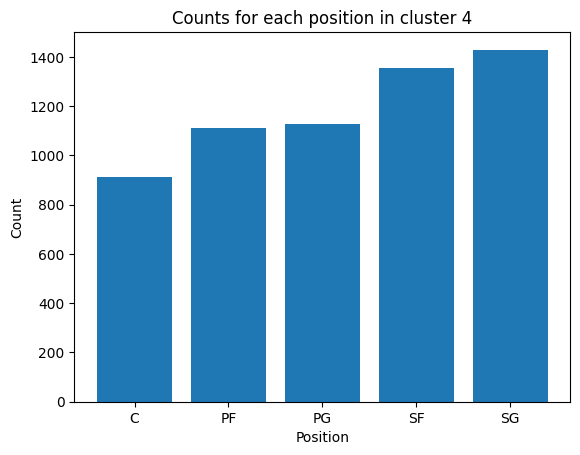

In [12]:
for cluster in range(5):
    cur_df = unsupervised_kmeans_stats_2.loc[unsupervised_kmeans_stats_2["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

### Division by Number of Minutes

In [13]:
# TODO: Division by number of minutes
unsupervised_kmeans_stats_3 = unsupervised_kmeans_stats.copy()
unsupervised_kmeans_stats_3.insert(0, "MIN", stats["MP"])
unsupervised_kmeans_stats_3[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]] = (
    unsupervised_kmeans_stats_3[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]].div(unsupervised_kmeans_stats_3["MIN"], axis=0)
)
unsupervised_kmeans_stats_3 = unsupervised_kmeans_stats_3.drop("MIN", axis=1).dropna()

kmeans = KMeans(n_clusters=5)
kmeans.fit(unsupervised_kmeans_stats_3)

unsupervised_kmeans_stats_3["cluster"] = kmeans.labels_
unsupervised_kmeans_stats_3.insert(0, "Pos", stats["Pos"])
unsupervised_kmeans_stats_3.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
3851,C,0.351769,0.105327,0.270028,0.067507,0.032534,0.042294,2
3852,C,0.617531,0.080891,0.251127,0.108794,0.031567,0.079763,1
3853,SF,0.330287,0.057876,0.137076,0.061358,0.047868,0.005222,2
3854,PG,0.294498,0.025890,0.085761,0.090615,0.058252,0.001618,4
3855,PG,0.530988,0.037270,0.084590,0.156616,0.057370,0.009213,3


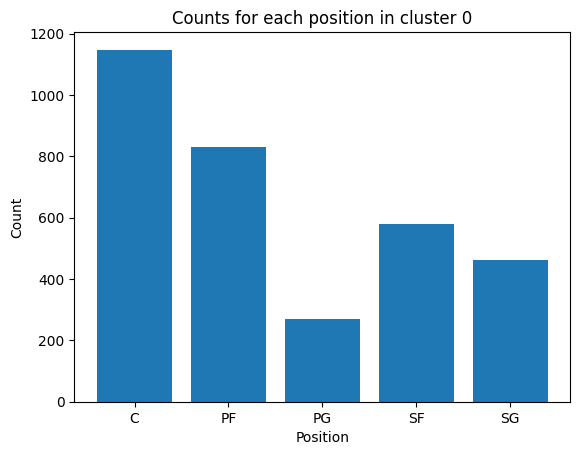

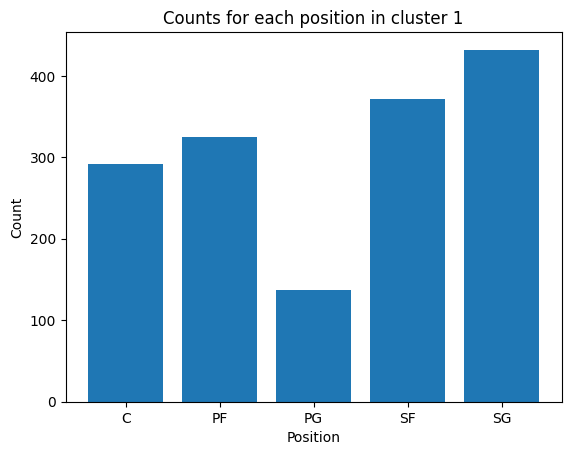

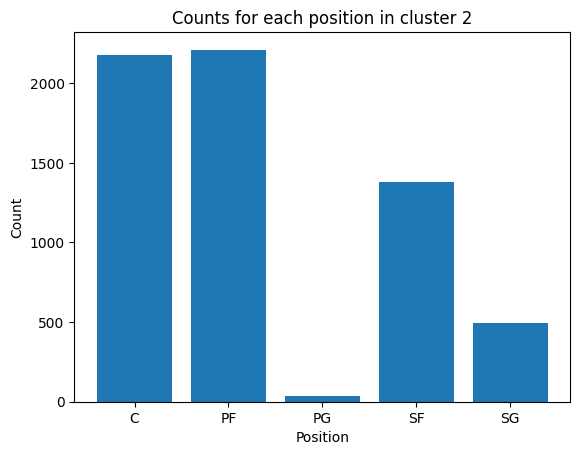

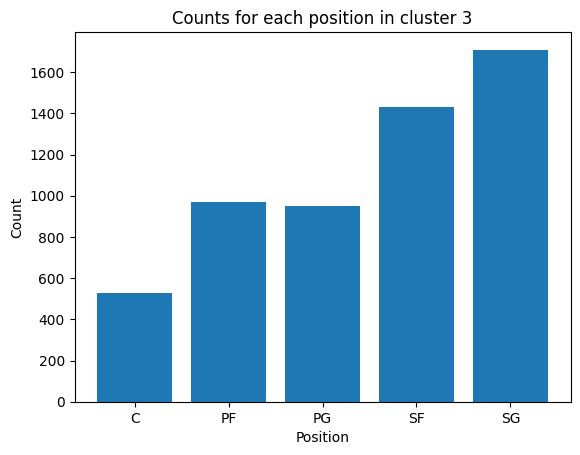

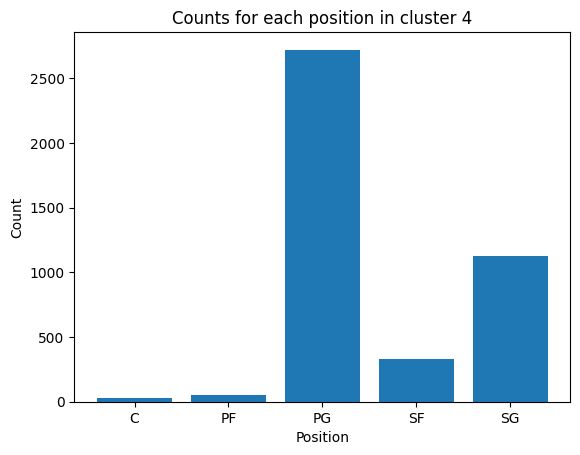

In [14]:
for cluster in range(5):
    cur_df = unsupervised_kmeans_stats_3.loc[unsupervised_kmeans_stats_3["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

In [15]:
for column in stats:
    print(column)

Index
Year
Player
Pos
Age
Tm
G
GS
MP
PER
TS%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
USG%
blanl
OWS
DWS
WS
WS/48
blank2
OBPM
DBPM
BPM
VORP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS


# Agglomerative Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_stats = stats[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]].dropna()

agglomerative_stats_1 = agglomerative_stats.copy()
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_clustering.fit(agglomerative_stats_1)

agglomerative_stats_1["cluster"] = agglomerative_clustering.labels_
agglomerative_stats_1.insert(0, "Pos", stats["Pos"])
agglomerative_stats_1.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
3851,C,865.0,259.0,664.0,166.0,80.0,104.0,0
3852,C,2191.0,287.0,891.0,386.0,112.0,283.0,1
3853,SF,759.0,133.0,315.0,141.0,110.0,12.0,0
3854,PG,182.0,16.0,53.0,56.0,36.0,1.0,4
3855,PG,1268.0,89.0,202.0,374.0,137.0,22.0,0


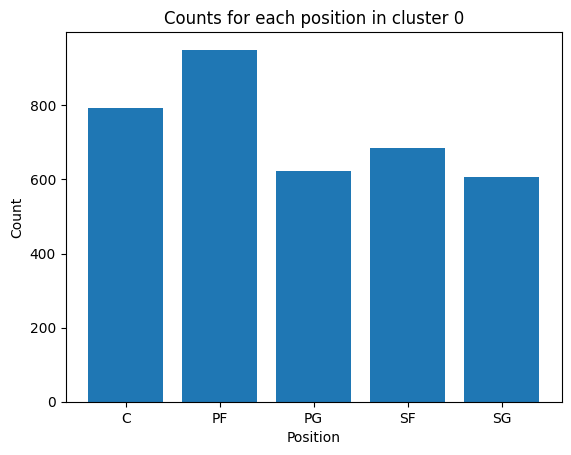

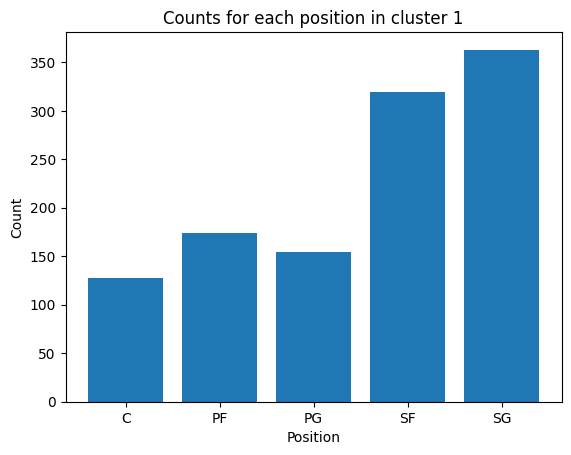

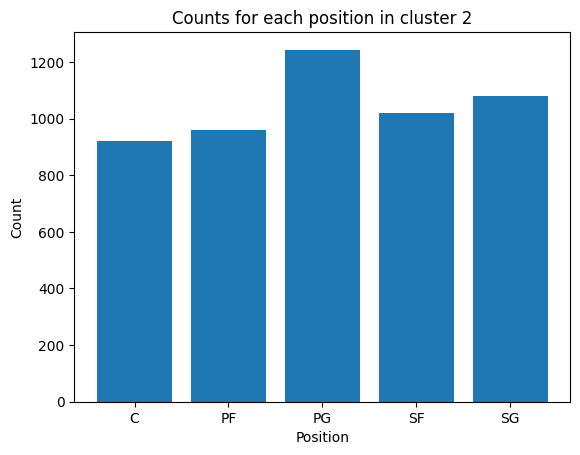

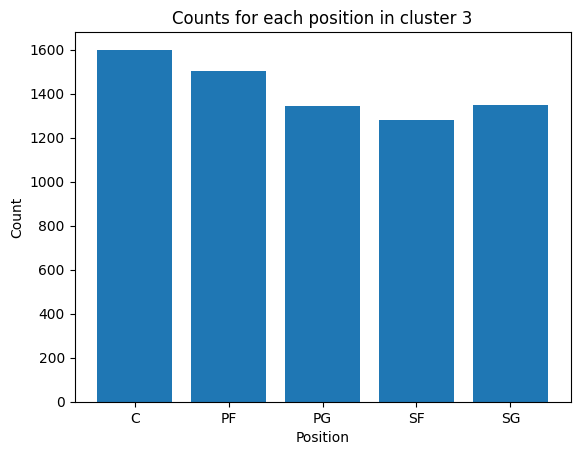

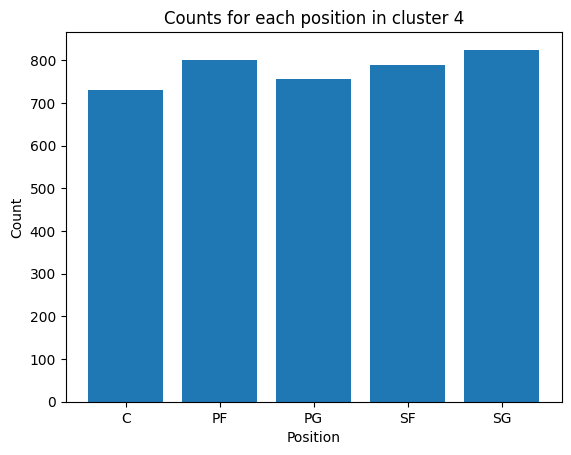

In [18]:
for cluster in range(5):
    cur_df = agglomerative_stats_1.loc[agglomerative_stats_1["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

### Normalization

In [21]:
# Normalization
agglomerative_stats_2 = (agglomerative_stats-agglomerative_stats.mean())/agglomerative_stats.std()

agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_clustering.fit(agglomerative_stats_2)

agglomerative_stats_2["cluster"] = agglomerative_clustering.labels_
agglomerative_stats_2.insert(0, "Pos", stats["Pos"])
agglomerative_stats_2.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
3851,C,0.764401,2.931790,3.550634,0.388506,1.039005,2.161562,4
3852,C,3.507900,3.348581,5.109527,1.994608,1.867051,7.022579,2
3853,SF,0.545087,1.056232,1.153922,0.205994,1.815298,-0.336838,0
3854,PG,-0.648728,-0.685358,-0.645328,-0.414545,-0.099557,-0.635560,1
3855,PG,1.598210,0.401275,0.377910,1.907002,2.513961,-0.065273,0


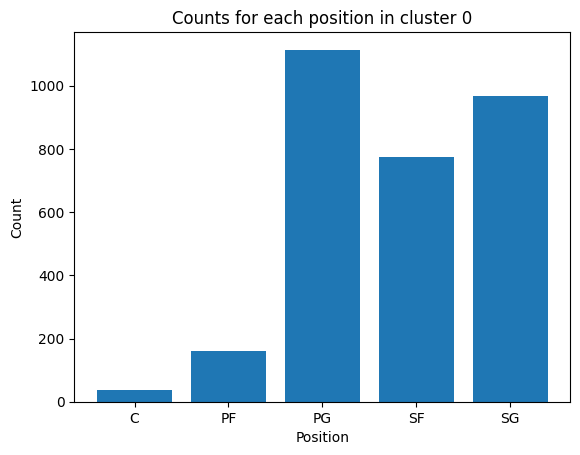

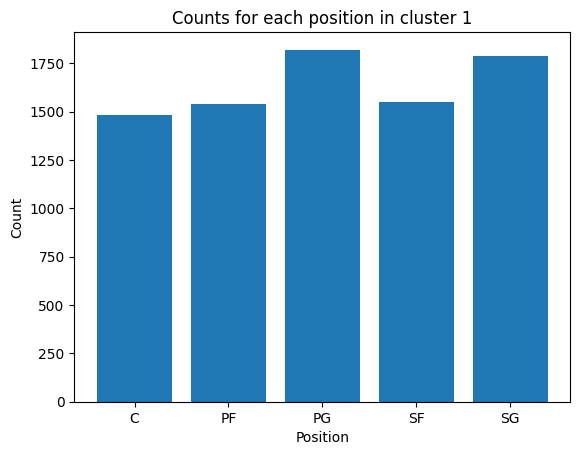

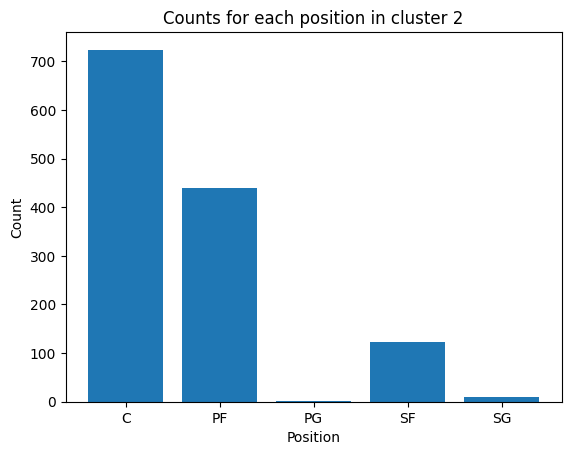

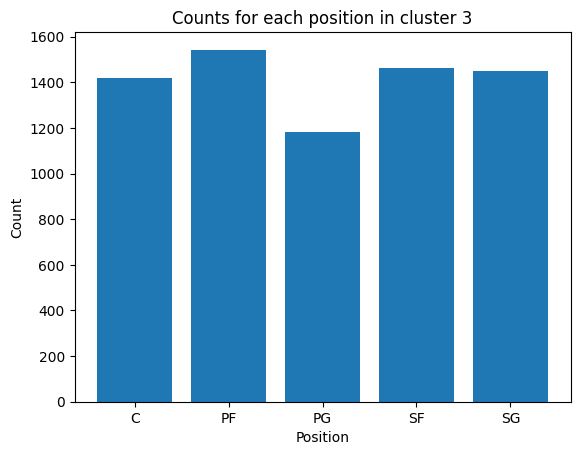

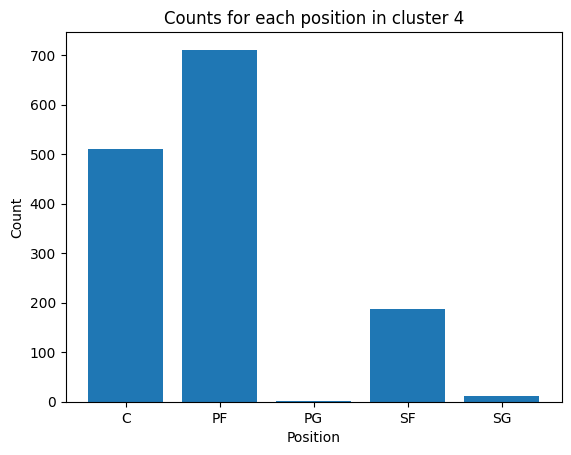

In [22]:
for cluster in range(5):
    cur_df = agglomerative_stats_2.loc[agglomerative_stats_2["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

### Normalization with 3 Clusters

In [23]:
# Normalization
agglomerative_stats_3 = (agglomerative_stats-agglomerative_stats.mean())/agglomerative_stats.std()

agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
agglomerative_clustering.fit(agglomerative_stats_3)

agglomerative_stats_3["cluster"] = agglomerative_clustering.labels_
agglomerative_stats_3.insert(0, "Pos", stats["Pos"])
agglomerative_stats_3.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
3851,C,0.764401,2.931790,3.550634,0.388506,1.039005,2.161562,1
3852,C,3.507900,3.348581,5.109527,1.994608,1.867051,7.022579,1
3853,SF,0.545087,1.056232,1.153922,0.205994,1.815298,-0.336838,2
3854,PG,-0.648728,-0.685358,-0.645328,-0.414545,-0.099557,-0.635560,0
3855,PG,1.598210,0.401275,0.377910,1.907002,2.513961,-0.065273,2


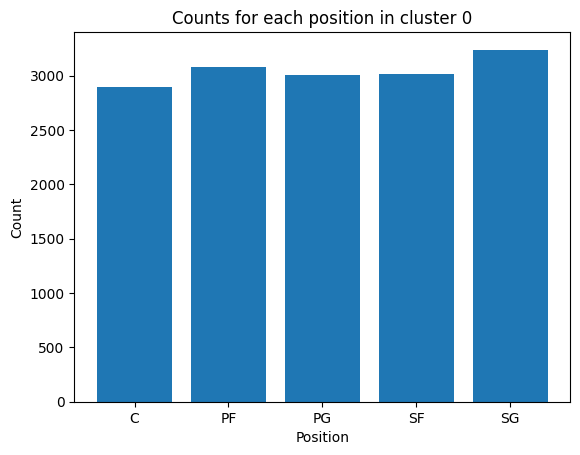

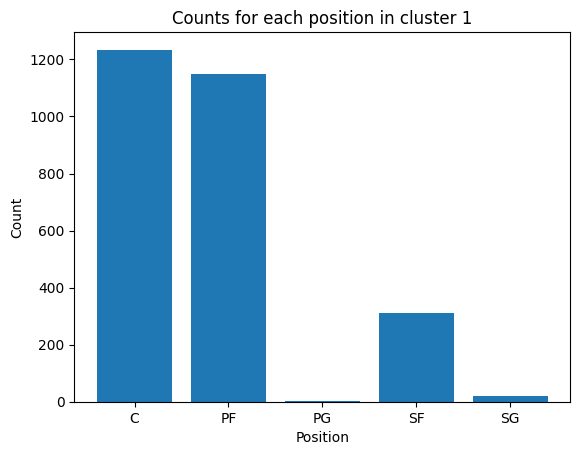

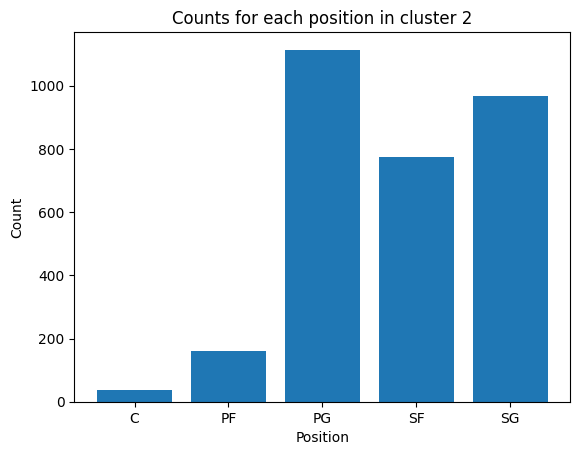

In [24]:
for cluster in range(3):
    cur_df = agglomerative_stats_3.loc[agglomerative_stats_3["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()